# Ground truth tests for analysis of generation data 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from visualization import *

# defining a constant for p*K to keep it constant
p_base = 0.5
K_base = 5
constant_product = p_base * K_base  # reference value for p*K

# generate the values of p and K to test with the linear scan
p_values = list(np.linspace(0.1, 0.9, 20))  # 5 values of p
K_values = [int(round(constant_product / p)) for p in p_values]  
# start the parameter scan
results_linear = parameter_scan_ground_truth(n=100, m=200, p=p_values, d=10, s=1.0, device="cpu",
                                             K=K_values, linear=True)

# Get the results of the parameter scan
p_tested = [res['params']['p'] for res in results_linear]
gt_accuracy = [res['results']['gt_accuracy'] for res in results_linear]

# Plot GT Accuracy vs p
plt.figure(figsize=(8,5))
plt.plot(p_tested, gt_accuracy, marker='o', linestyle='-', color='b', label="GT Accuracy")
plt.xlabel("p")
plt.ylabel("Ground Truth Accuracy")
plt.title("GT Accuracy vs p (Linear Scan)")
plt.grid(True)
plt.legend()
plt.savefig('Results/gt_accuracy_vs_p_linear_scan.png')
plt.show()
# plot GT Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(K_values, gt_accuracy, marker='o', linestyle='-', color='b', label="GT Accuracy")
plt.xlabel("num labels")
plt.ylabel("Ground Truth Accuracy")
plt.title("GT Accuracy vs num labels (Linear Scan)")
plt.grid(True)
plt.legend()
plt.savefig('Results/gt_accuracy_vs_numlabel_linear_scan.png')
plt.show()


ModuleNotFoundError: No module named 'plotly'

Saved heatmap as Results/heatmap_gt_accuracy_numlabel_p.png


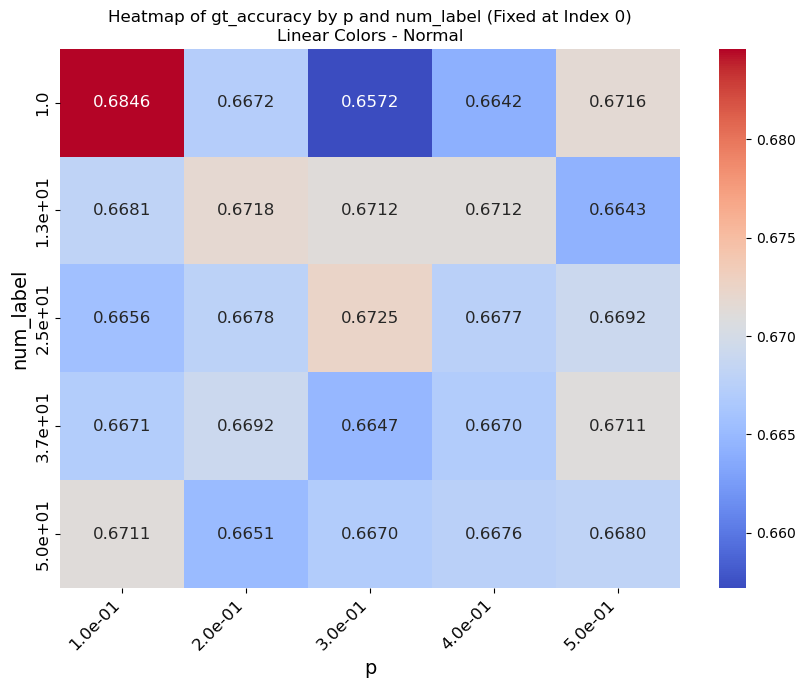

In [ ]:
from helpers import parameter_scan_ground_truth
import numpy as np


# define values for p and K
p_values = list(np.linspace(0.1, 0.5, 5))  # 5 valeurs entre 0.1 et 0.5
K_values = np.linspace(1, 50, 5, dtype=int)  # 5 values between 1 et 50


# launch parameter scan with linear=False
results_full = parameter_scan_ground_truth(n=1000, m=1000, p=p_values, d=2, s=2.0, device="cpu",
                                           K=K_values, linear=False)

from visualization import plot_all_heatmaps

# plot heatmap for gt_accuracy vs p and K

plot_all_heatmaps(results_full, "p", "K", "gt_accuracy", save_path="Results/heatmap_gt_accuracy_numlabel_p")




# Analysis of s parameter

In [ ]:
from helpers import parameter_scan_ground_truth
import numpy as np


# define values for p and K
p_values = list(np.linspace(0.1, 0.5, 5))  # 5 valeurs entre 0.1 et 0.5
K_values = np.linspace(1, 50, 5, dtype=int)  # 5 values between 1 et 50
s = np.linspace(1, 10, 5, dtype=int)  # 5 values between 1 et 50


# launch parameter scan with linear=False
results_full = parameter_scan_ground_truth(n=1000, m=1000, p=p_values, d=2, s=s, device="cpu",
                                           K=K_values, linear=False)






Training Progress: 100%|██████████| 125/125 [1:03:26<00:00, 30.45s/it]


Saved heatmap as Results/heatmap_gt_accuracy_numlabel_p_s.png


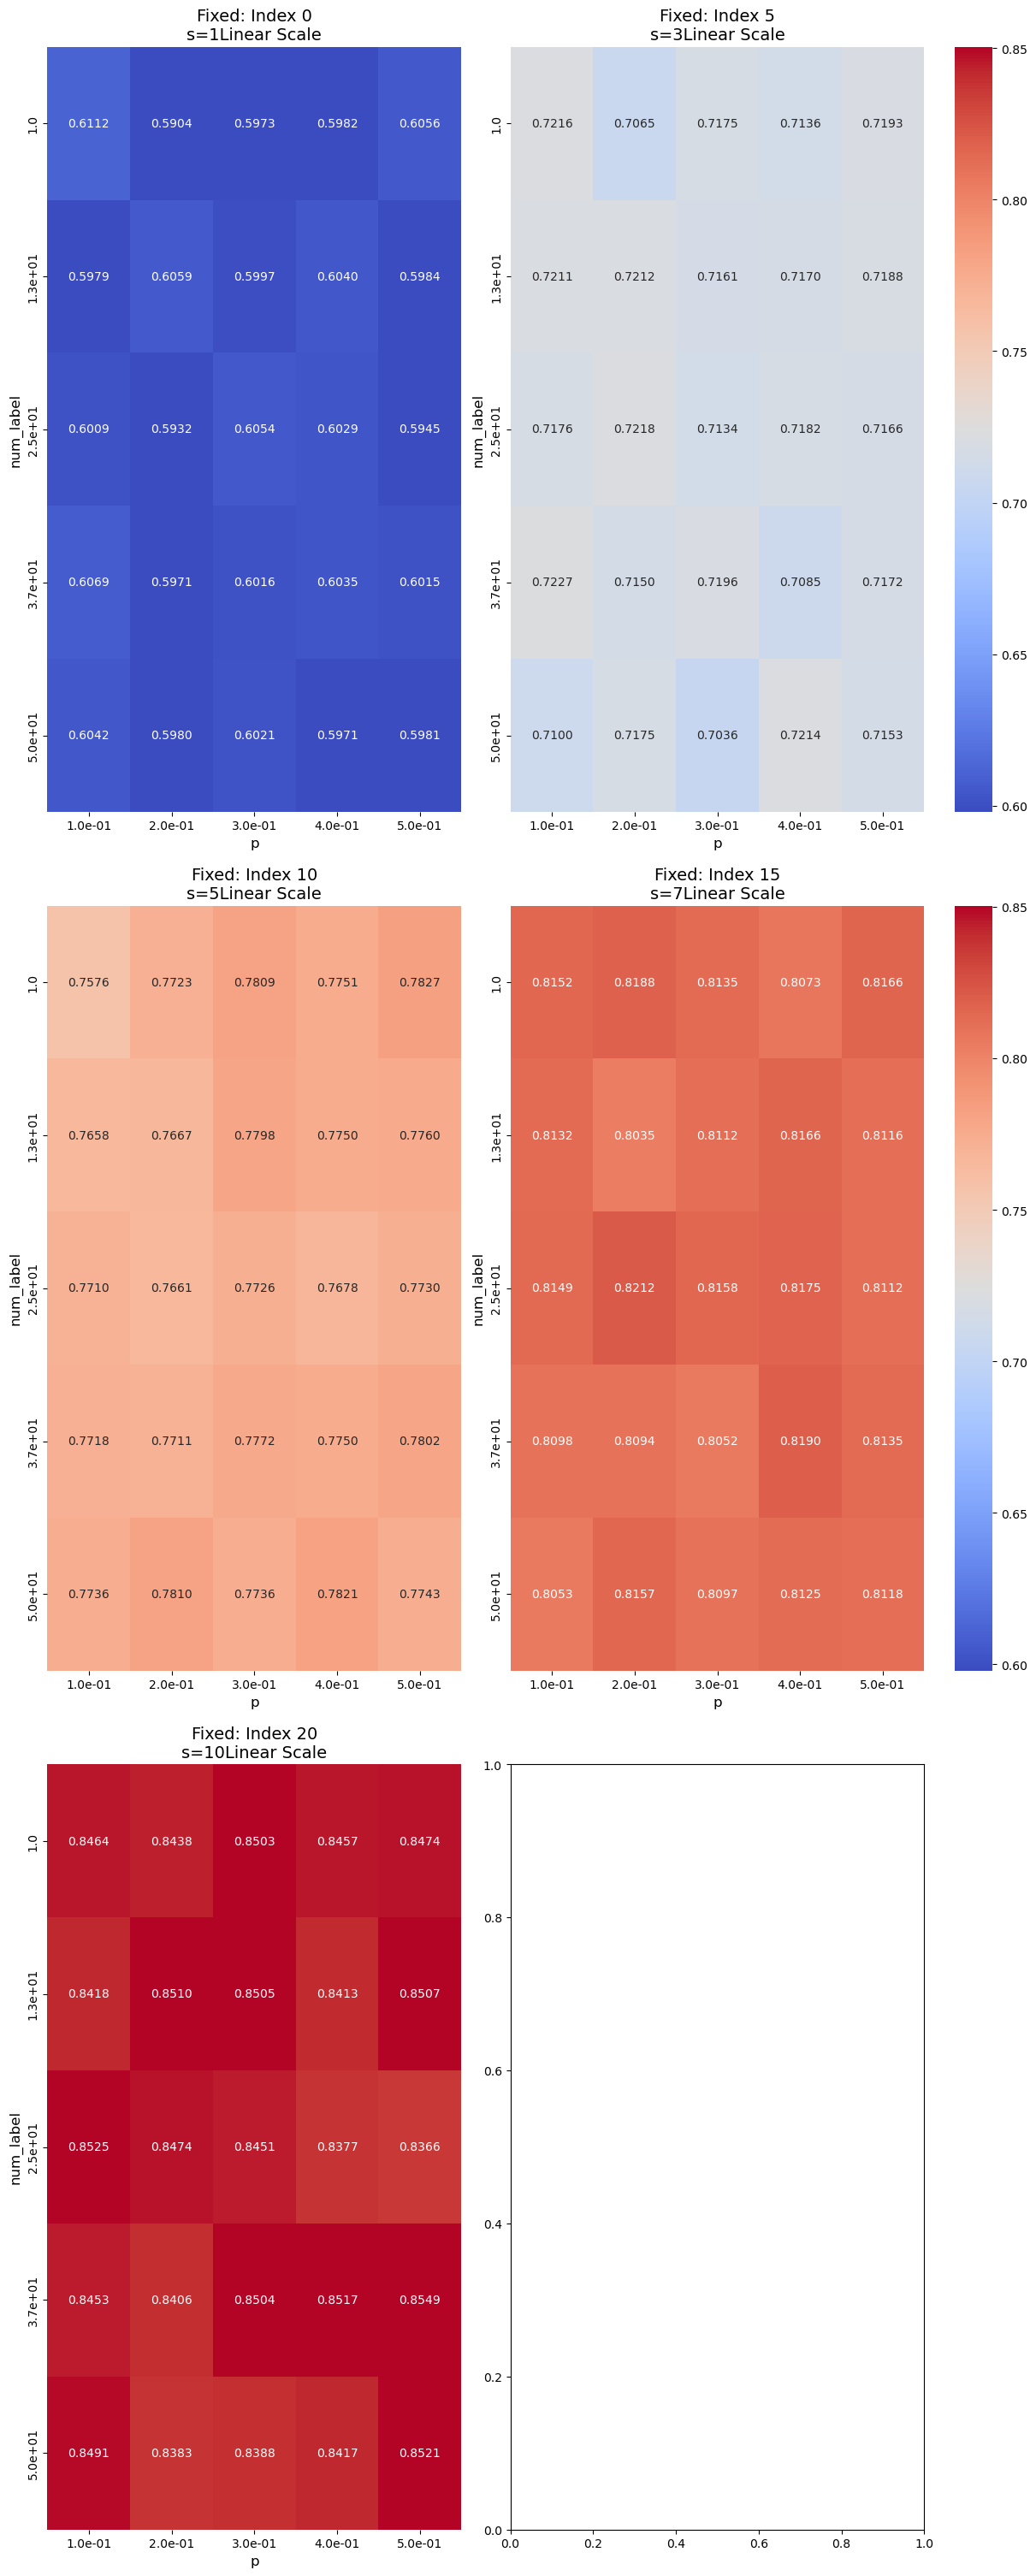

In [ ]:
from visualization import plot_all_heatmaps

# plot heatmap for gt_accuracy vs p and K

plot_all_heatmaps(results_full, 
                  "p", 
                  "K", 
                  "gt_accuracy", 
                  save_path="Results/heatmap_gt_accuracy_numlabel_p_s",
                  fig_size= (12, 10))



# Analysis of impact of K on std

In [ ]:
from helpers import parameter_scan_ground_truth
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Configuration fixe
n = 1000
m = 1000
p = 0.5
s = 1
d = 4
device = "cpu"
reps = 20

# Valeurs de K de 1 à 7
K_values = list(range(1, 11))

# Lancer le scan
results = parameter_scan_ground_truth(
    n=n, m=m, p=p, d=d, s=s, device=device,
    K=K_values, linear=True, reps=reps
)


Training Progress: 100%|██████████| 10/10 [39:22<00:00, 236.22s/it]


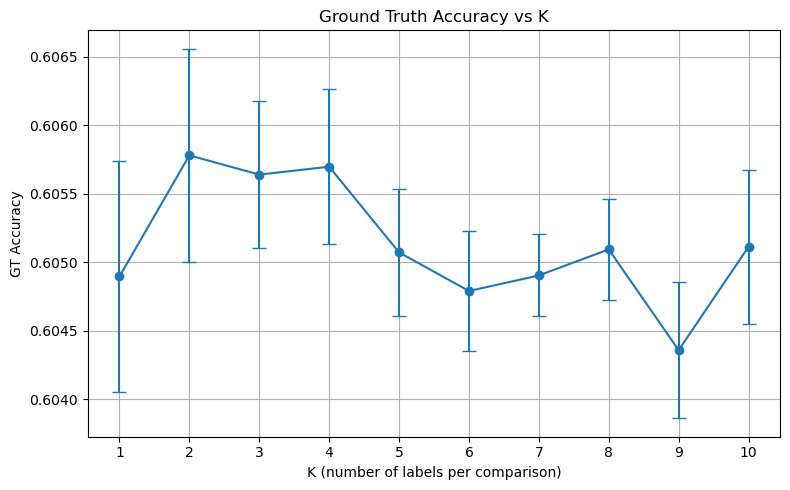

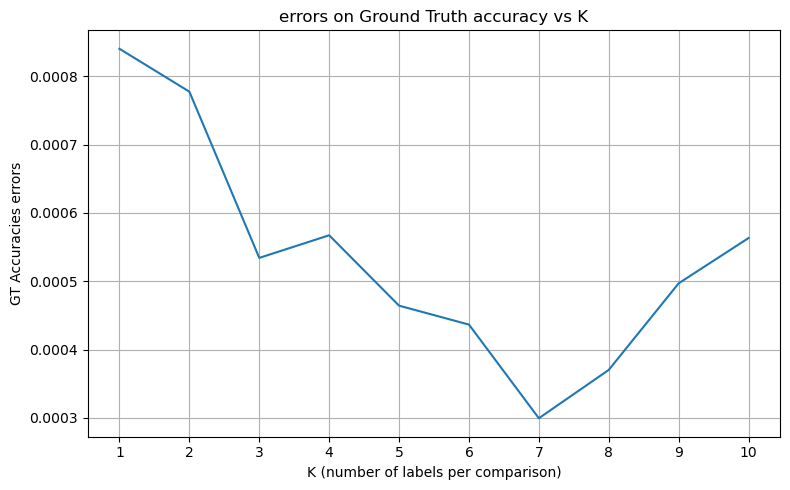

In [ ]:

# Extraire gt_accuracy pour chaque K
K_plot = []
means = []
errors = []

for exp in results:
    K_val = exp['params']['K']
    accuracies = exp['results']['gt_accuracy']
    K_plot.append(K_val)
    means.append(np.mean(accuracies))
    errors.append(sem(accuracies))

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(K_plot, means, yerr=errors, fmt='o-', capsize=5)
plt.title("Ground Truth Accuracy vs K")
plt.xlabel("K (number of labels per comparison)")
plt.ylabel("GT Accuracy")
plt.grid(True)
plt.xticks(K_plot)
plt.tight_layout()
plt.savefig('Results/gt_accuracy_vs_K_linear_scan_4.png')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(K_plot, errors)
plt.title("errors on Ground Truth accuracy vs K")
plt.xlabel("K (number of labels per comparison)")
plt.ylabel("GT Accuracies errors")
plt.grid(True)
plt.xticks(K_plot)
plt.tight_layout()
plt.savefig('Results/gt_accuracy_error_vs_K_linear_scan_4.png')
plt.show()


# analysis of Gt accuracy vs d

In [4]:
import pickle
with open("Data_2/scan_d_d1.pkl", "rb") as f:
    results = pickle.load(f)

# Extract the values of d and d1 from the results
d_values = [res['params']['d'] for res in results]
d1_values = [res['params']['d1'] for res in results]

# display the values of d and d1
print("d values:", d_values)
print("d1 values:", d1_values)


d values: [2, 2, 4, 4, 6, 6, 8, 8]
d1 values: [4, None, 4, None, 4, None, 4, None]


In [ ]:
from helpers import parameter_scan_ground_truth
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Configuration fixe
n = 500
m = 500
p = [0.01, 0.05, 0.1, 0.5, 0.9]
s = 1
d = 2
device = "cpu"
reps = 4

K_values = 1

# Lancer le scan
results = parameter_scan_ground_truth(
    n=n, m=m, p=p, d=d, s=s, device=device,
    K=K_values, linear=True, reps=reps
)


In [ ]:

# Extraire gt_accuracy pour chaque K
K_plot = []
means = []
errors = []

for exp in results:
    K_val = exp['params']['p']
    accuracies = exp['results']['gt_accuracy']
    K_plot.append(K_val)
    means.append(np.mean(accuracies))
    errors.append(sem(accuracies))

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(K_plot, means, yerr=errors, fmt='o-', capsize=5)
plt.title("Ground Truth Accuracy vs p")
plt.xlabel("p")
plt.ylabel("GT Accuracy")
plt.grid(True)
plt.xticks(K_plot)
plt.tight_layout()
plt.savefig('Results/gt_accuracy_vs_p_linear_scan.png')
plt.show()
# should see no difference in the GT accuracy for different values of d


In [4]:
from helpers import parameter_scan_ground_truth
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Configuration fixe
n = [ 100, 300, 500,  700,  900]
m = 1000
p = [0.1, 0.5, 0.9]
s = [1, 5]
d = 2
device = "cpu"
reps = 3

K_values = 1

# Lancer le scan
results = parameter_scan_ground_truth(
    n=n, m=m, p=p, d=d, s=s, device=device,
    K=K_values, linear=True, reps=reps
)


Training Progress: 100%|██████████| 30/30 [07:05<00:00, 14.19s/it]


In [5]:
from visualization import plot_metrics_vs_param

plot_metrics_vs_param(
    results, 
    param_name="n", 
    metric_name="gt_accuracy", 
    group_by="p",
    split_by="s",
    sub_plot=True,
    save_path="Results/gt_accuracy_vs_n_linear_scan.png",
)


ModuleNotFoundError: No module named 'plotly'

In [1]:
from helpers import parameter_scan_ground_truth
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Configuration fixe
n = 1000
m = 1000
p = 0.5
# s = [1, 2, 3, 4, 5]
# s= [1, 10, 30]
s= [1, 3, 9]
d = [1, 2, 3, 4, 5, 6, 7]
device = "cpu"
reps = 3

K_values = [2]

# Lancer le scan
results = parameter_scan_ground_truth(
    n=n, m=m, p=p, d=d, s=s, device=device,
    K=K_values, linear=False, reps=reps
)


Training Progress: 100%|██████████| 21/21 [10:14<00:00, 29.26s/it]


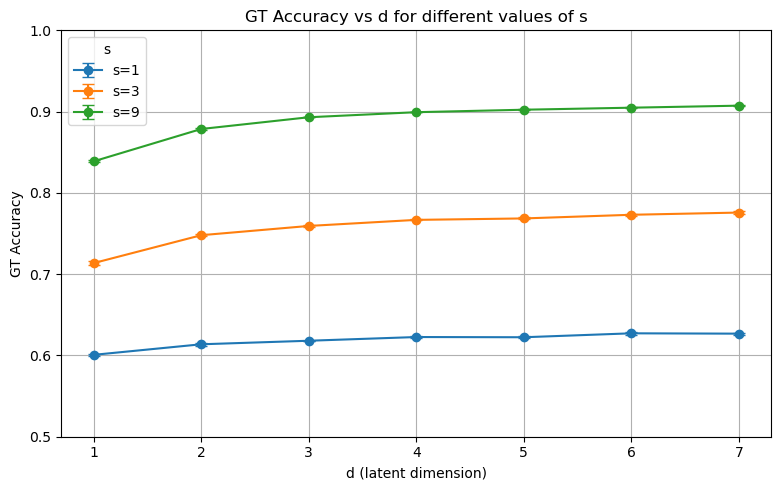

[0.6007333333333333, 0.71362, 0.8388266666666667]


In [2]:

# Organize results by 's'
grouped_results = {}
for exp in results:
    s_val = exp['params']['s']
    d_val = exp['params']['d']
    acc = exp['results']['gt_accuracy']

    if s_val not in grouped_results:
        grouped_results[s_val] = {}
    grouped_results[s_val][d_val] = acc

# Plot for each 's'
plt.figure(figsize=(8, 5))
a = []
for s_val, d_dict in sorted(grouped_results.items()):
    d_vals = sorted(d_dict.keys())
    means = [np.mean(d_dict[d]) for d in d_vals]
    a.append(means[0])
    errors = [sem(d_dict[d]) for d in d_vals]
    
    plt.errorbar(d_vals, means, yerr=errors, label=f"s={s_val}", capsize=4, marker='o', linestyle='-')

plt.title("GT Accuracy vs d for different values of s")
plt.xlabel("d (latent dimension)")
plt.ylabel("GT Accuracy")
plt.grid(True)
plt.legend(title="s")
plt.xticks(sorted(set(exp['params']['d'] for exp in results)))
plt.tight_layout()
plt.ylim(0.5, 1)
plt.savefig("Results_2/gt_accuracy_vs_d_per_s.png")
plt.show()
# should see no difference in the GT accuracy for different values of d
print(a)

In [1]:
from helpers import parameter_scan_ground_truth
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Configuration fixe
n = [100, 500, 1000, 1500]
m = 1000
p = 0.5
# s = [1, 2, 3, 4, 5]
# s= [1, 10, 30]
s= [1, 3, 9]
# s= 3
# d = [1, 2, 3, 4, 5, 6, 7]
d = 2
device = "cpu"
reps = 1

K_values = [2]

# Lancer le scan
results = parameter_scan_ground_truth(
    n=n, m=m, p=p, d=d, s=s, device=device,
    K=K_values, linear=False, reps=reps
)


Training Progress: 100%|██████████| 12/12 [02:08<00:00, 10.74s/it]


c:\Users\Mayeul\anaconda3\envs\ML_project\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Mayeul\anaconda3\envs\ML_project\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


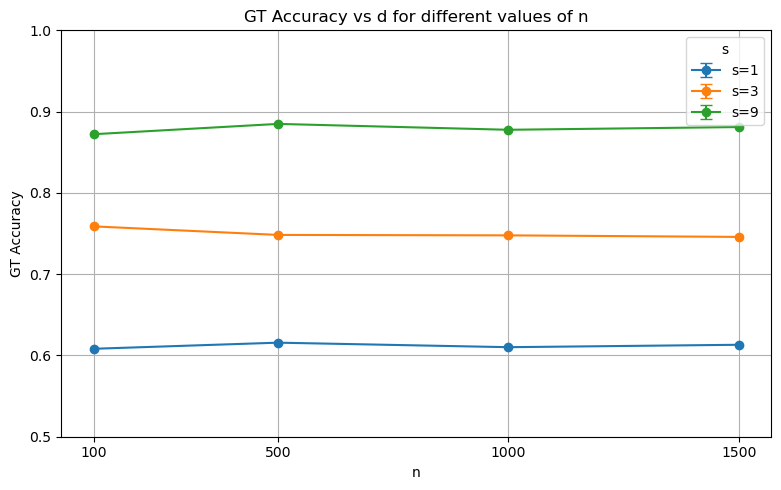

[0.6082, 0.7588, 0.8722]


In [2]:

# Organize results by 's'
grouped_results = {}
for exp in results:
    s_val = exp['params']['s']
    d_val = exp['params']['n']
    acc = exp['results']['gt_accuracy']

    if s_val not in grouped_results:
        grouped_results[s_val] = {}
    grouped_results[s_val][d_val] = acc

# Plot for each 's'
plt.figure(figsize=(8, 5))
a = []
for s_val, d_dict in sorted(grouped_results.items()):
    d_vals = sorted(d_dict.keys())
    means = [np.mean(d_dict[d]) for d in d_vals]
    a.append(means[0])
    errors = [sem(d_dict[d]) for d in d_vals]
    
    plt.errorbar(d_vals, means, yerr=errors, label=f"s={s_val}", capsize=4, marker='o', linestyle='-')

plt.title("GT Accuracy vs d for different values of n")
plt.xlabel("n")
plt.ylabel("GT Accuracy")
plt.grid(True)
plt.legend(title="s")
plt.xticks(sorted(set(exp['params']['n'] for exp in results)))
plt.tight_layout()
plt.ylim(0.5, 1)
plt.savefig("Results_2/gt_accuracy_vs_d_per_n_2.png")
plt.show()
# should see no difference in the GT accuracy for different values of d
print(a)

In [ ]:
from helpers import evaluate_ground_truth
import numpy as np

# Fixed parameters
n = 1000
m = 1000
p = 0.01
d = 1
s = 50
K = 1
device = "cpu"
reps = 5  # you can increase to get mean/std
print('test')
# Run the GT evaluation
gt_losses, gt_accuracies = evaluate_ground_truth(
    n=n,
    m=m,
    p=p,
    d=d,
    s=s,
    device=device,
    K=K,
    reps=reps
)
print('test')

# Print results
print(f"GT Accuracy: {gt_accuracies}")
print(f"GT Losses: {gt_losses}")
print(f"Mean Accuracy: {np.mean(gt_accuracies):.4f}")


test
test
GT Accuracy: [0.476, 0.518, 0.518, 0.51, 0.526]
GT Losses: [0.25, 0.25, 0.25, 0.25, 0.25]
Mean Accuracy: 0.5096


### test

In [ ]:
import torch
from helpers import BTLPreferenceDataset, split_dataset
from generation_data import generate_embeddings

# Paramètres
n = 1000
m = 1000
d = 1
p = 0.5
s = 50
K = 1
device = "cpu"

# Étape 1 : Générer les embeddings
U, V = generate_embeddings(n=n, m=m, d=d, device=device)

# Étape 2 : Calcul du nombre de paires (en cohérence avec helpers.py)
num_datapoints = int(n * m * p / 2)

# Étape 3 : Créer le dataset BTL
dataset = BTLPreferenceDataset(U, V, num_datapoints=num_datapoints, scale=s, K=K)

# Étape 4 : Afficher quelques exemples
print(f"Total datapoints: {len(dataset)}")
print("Quelques exemples du dataset (u, i, j, label):")
for idx in range(10):
    print(dataset[idx])



Total datapoints: 250000
Quelques exemples du dataset (u, i, j, label):
(34, 494, 831, 1.0)
(27, 653, 815, 1.0)
(72, 411, 363, 1.0)
(237, 943, 236, 1.0)
(380, 343, 588, 1.0)
(91, 225, 41, 0.0)
(766, 478, 283, 1.0)
(722, 833, 640, 0.0)
(376, 603, 873, 1.0)
(552, 785, 369, 0.0)


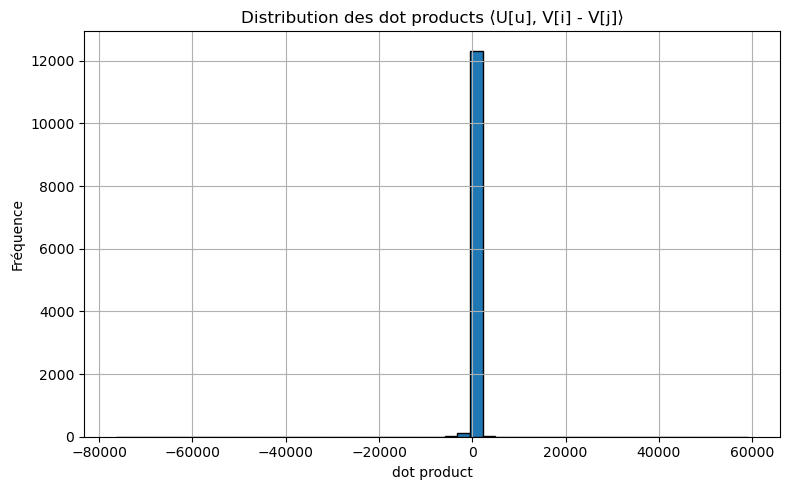

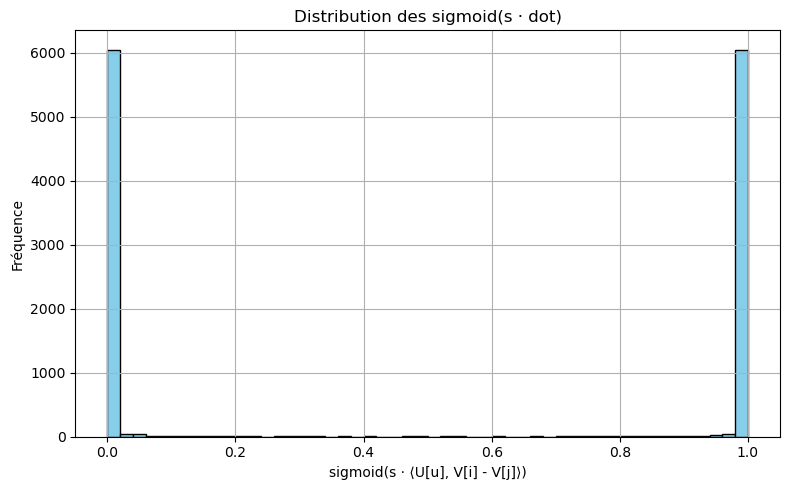

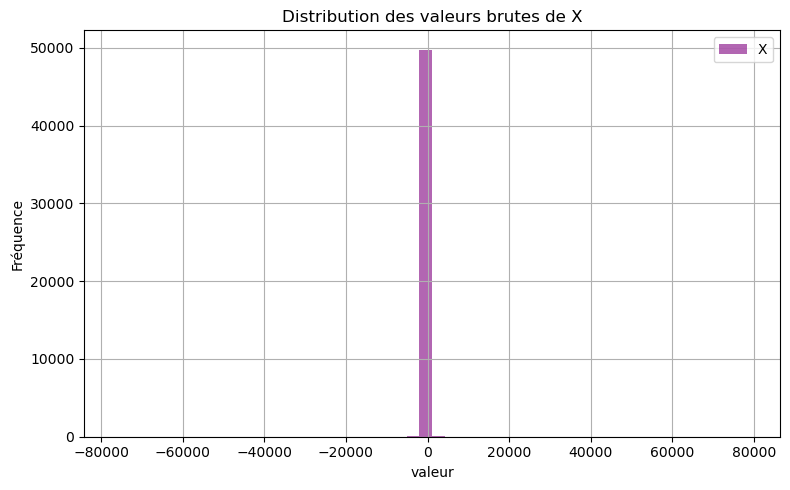


--- Statistiques ---
DOT PRODUCT  : mean = -19.7960, std = 1766.8652
SIGMOID SCORES: mean = 0.5000, std = 0.4960
U values     : mean = 1.0000, std = 1238.9308
U values     : min = -76424.5703, max = 78655.1953
DOT PRODUCT  : min = -76435.5312, max = 59166.8672
SIGMOID SCORES: min = 0.0000, max = 1.0000


In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.nn.functional import sigmoid
from generation_data import generate_embeddings
from helpers import BTLPreferenceDataset
import numpy as np

# Paramètres
n = 100
m = 500

p = 0.5
s = 5
K = 1
device = "cpu"
d=5
# Générer les embeddings
X = generate_embeddings(n=n, m=m, d=d, device=device)

# Créer le dataset
num_datapoints = int(n * m * p / 2)
dataset = BTLPreferenceDataset(X, num_datapoints=num_datapoints, scale=s, K=K)

# Extraire les dot products et sigmoids
dots = []
sigmoids = []

for (u, i, j, label) in dataset:
    dot = X[u,i] - X[u,j]
    dots.append(dot.item())
    sigmoids.append(sigmoid(s * dot).item())

# ➤ 1. Plot des dot products
plt.figure(figsize=(8, 5))
plt.hist(dots, bins=50, edgecolor='black')
plt.title("Distribution des dot products ⟨U[u], V[i] - V[j]⟩")
plt.xlabel("dot product")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()


# ➤ 2. Plot des valeurs sigmoid(s · dot)
plt.figure(figsize=(8, 5))
plt.hist(sigmoids, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution des sigmoid(s · dot)")
plt.xlabel("sigmoid(s · ⟨U[u], V[i] - V[j]⟩)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()

plt.show()

# ➤ 3. Distribution des valeurs de U et V
plt.figure(figsize=(8, 5))
plt.hist(X.view(-1).numpy(), bins=50, alpha=0.6, label='X', color='purple')
plt.title("Distribution des valeurs brutes de X")
plt.xlabel("valeur")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# ➤ 4. Affichage des valeurs statistiques
dots_np = np.array(dots)
sigmoids_np = np.array(sigmoids)
X_np = X.cpu().view(-1).numpy()

print("\n--- Statistiques ---")
print(f"DOT PRODUCT  : mean = {dots_np.mean():.4f}, std = {dots_np.std():.4f}")
print(f"SIGMOID SCORES: mean = {sigmoids_np.mean():.4f}, std = {sigmoids_np.std():.4f}")
print(f"U values     : mean = {X_np.mean():.4f}, std = {X_np.std():.4f}")
# print the min and max of the values of U and V, of the sigmoid and of the dot product
print(f"U values     : min = {X_np.min():.4f}, max = {X_np.max():.4f}")
print(f"DOT PRODUCT  : min = {dots_np.min():.4f}, max = {dots_np.max():.4f}")
print(f"SIGMOID SCORES: min = {sigmoids_np.min():.4f}, max = {sigmoids_np.max():.4f}")



C:\Users\Mayeul\AppData\Local\Temp\ipykernel_24316\4015384811.py:78: UserWarning: Glyph 10216 (\N{MATHEMATICAL LEFT ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mayeul\AppData\Local\Temp\ipykernel_24316\4015384811.py:78: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()


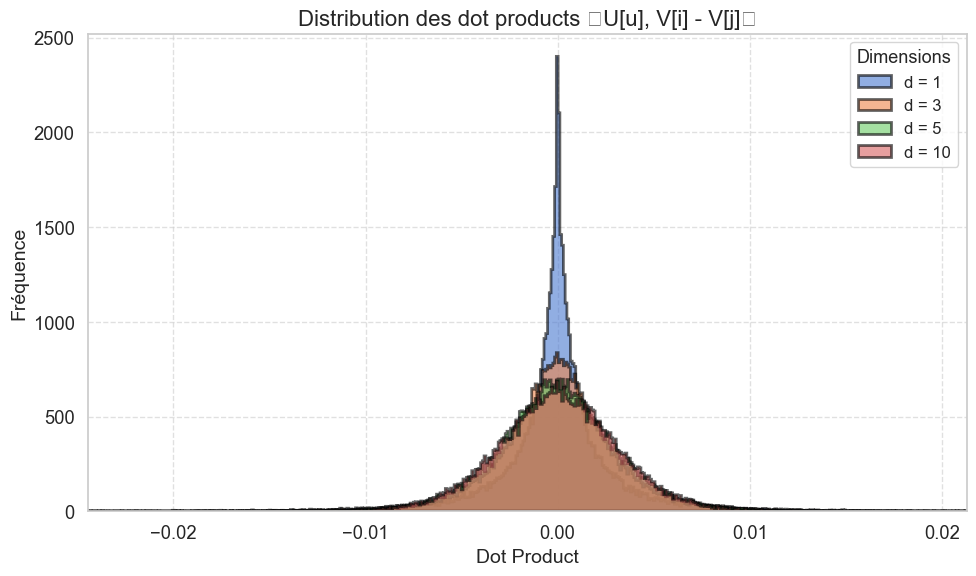

In [6]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from torch.nn.functional import sigmoid
from generation_data import generate_embeddings
from helpers import BTLPreferenceDataset
import numpy as np

# Paramètres
n = 100
m = 2000
p = 0.5
s = 5
K = 1
device = "cpu"

# Initialiser Seaborn
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(10, 6))

# Créer une liste pour tous les dots afin de déterminer les limites des bins
all_dots = []

for d in [1, 3, 5, 10]:
    # Générer les embeddings
    X= generate_embeddings(n=n, m=m, d=d, device=device)

    # Créer le dataset
    num_datapoints = int(n * m * p / 2)
    dataset = BTLPreferenceDataset(X, num_datapoints=num_datapoints, scale=s, K=K)

    # Extraire les dot products et sigmoids
    dots = []
    sigmoids = []

    for (u, i, j, label) in dataset:
        dot = X[u,i] - X[u,j]
        dots.append(dot.item())
        sigmoids.append(sigmoid(s * dot).item())

    # Stocker les dots pour déterminer les limites globales
    all_dots.extend(dots)

# Déterminer les bornes globales des dots pour les bins
min_dot = min(all_dots)
max_dot = max(all_dots)
bins = np.linspace(min_dot, max_dot, 50 * 10)  # 50 * d bins, mais sur une plage commune

# Repartir la génération des plots avec les mêmes bins
for d in [1,3, 5, 10]:
    # Générer les embeddings
    X = generate_embeddings(n=n, m=m, d=d, device=device)

    # Créer le dataset
    num_datapoints = int(n * m * p / 2)
    dataset = BTLPreferenceDataset(X, num_datapoints=num_datapoints, scale=s, K=K)

    # Extraire les dot products
    dots = []

    for (u, i, j, label) in dataset:
        dot = X[u,i] - X[u,j]
        dots.append(dot.item())

    # ➤ 1. Plot des dot products avec les mêmes bins
    plt.hist(dots, bins=bins, edgecolor='black', alpha=0.6, label=f'd = {d}', histtype='stepfilled', linewidth=2)

# Ajouter des labels et des titres
plt.title("Distribution des dot products ⟨U[u], V[i] - V[j]⟩", fontsize=16)
plt.xlabel("Dot Product", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.xlim(min_dot, max_dot)  # Limiter l'axe x avec les bornes globales
plt.legend(title="Dimensions", title_fontsize='13', loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le plot
plt.show()


tensor([0.0320])
tensor([-0.0225])
tensor([0.0008])
0.0
tensor([0.0014])
tensor([0.0482])
tensor([-0.0450])
1.0
tensor([-0.0002])
tensor([0.0148])
tensor([0.0387])
0.0
tensor([0.0227])
tensor([-0.0299])
tensor([0.0246])
0.0
tensor([-0.0582])
tensor([0.0305])
tensor([-0.0453])
0.0
tensor([0.0323])
tensor([-0.0208])
tensor([0.0244])
1.0
tensor([0.0100])
tensor([0.0079])
tensor([0.0135])
1.0
tensor([0.0190])
tensor([0.0199])
tensor([-0.0505])
1.0
tensor([-0.0167])
tensor([0.0232])
tensor([-0.0040])
0.0
tensor([-0.0047])
tensor([-0.0202])
tensor([0.0204])
1.0
tensor([-0.0211])
tensor([-0.0146])
tensor([-0.0390])
1.0


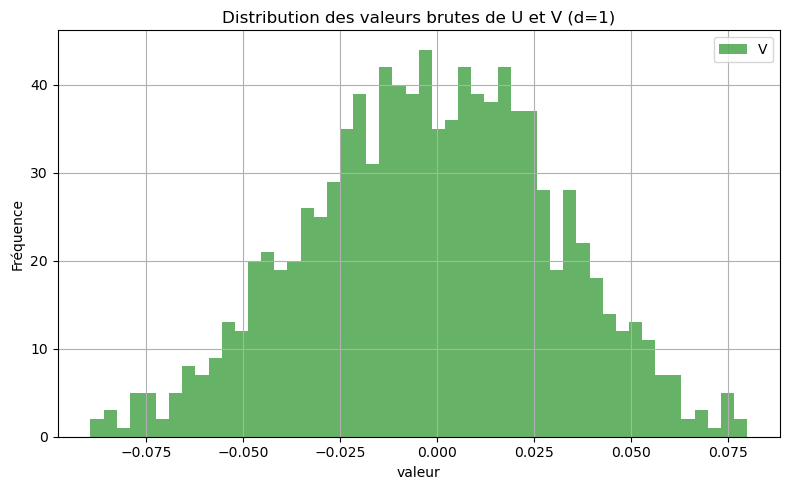

In [ ]:
for k, (u, i, j, label) in enumerate(dataset):
    print(U[u])
    print(V[i])
    print(V[j])
    print(label)
    if k == 10:
        break

np.unique(dots_np)
# ➤ 3. Distribution des valeurs de U et V
plt.figure(figsize=(8, 5))
# plt.hist(U.view(-1).numpy(), bins=50, alpha=0.6, label='U', color='purple')
plt.hist(V.view(-1).numpy(), bins=50, alpha=0.6, label='V', color='green')
plt.title("Distribution des valeurs brutes de U et V (d=1)")
plt.xlabel("valeur")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import torch
from torch.nn.functional import sigmoid

scores = torch.randn(10000)  # scores ~ N(0,1)
probs = sigmoid(5 * scores)  # s=5
labels = torch.bernoulli(probs)
preds = (scores > 0).float()
accuracy = (preds == labels).float().mean().item()

print(f"Simulated accuracy with s=5: {accuracy:.4f}")

Simulated accuracy with s=5: 0.8979


# New generation type 

Training Progress:   0%|          | 0/14 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 14/14 [27:17<00:00, 116.97s/it]


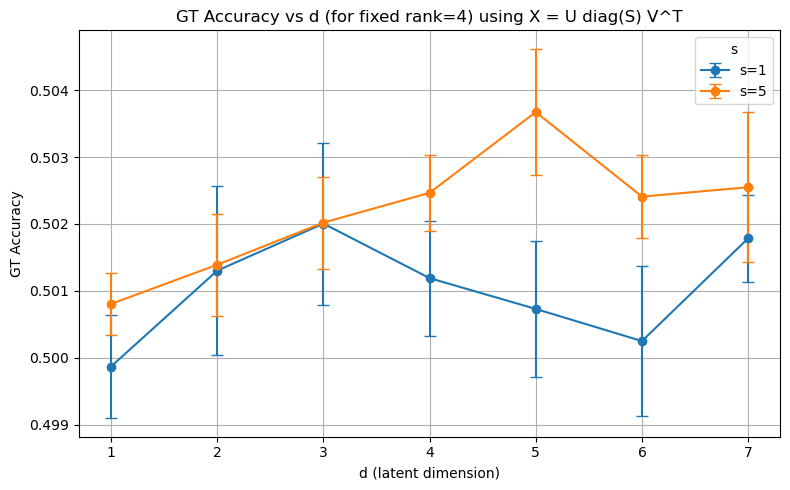

In [ ]:
from helpers import parameter_scan_ground_truth_from_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Configuration
n = 1000
m = 1000
p = 0.5
s = [1, 5]           # scaling
d = [1, 2, 3, 4, 5, 6, 7]     # latent dimension
rank = 5                     # number of 1s in diag(S)
device = "cpu"
reps = 7
K = 2

# Launch scan (new version uses rank)
results = parameter_scan_ground_truth_from_matrix(
    n=n, m=m, d=d, rank=rank, p=p, s=s, device=device,
    K=K, reps=reps, linear=False
)

# Group results by scaling factor s
grouped_results = {}
for exp in results:
    s_val = exp['params']['s']
    d_val = exp['params']['d']
    acc = exp['results']['gt_accuracy']

    if s_val not in grouped_results:
        grouped_results[s_val] = {}
    grouped_results[s_val][d_val] = acc

# Plot
plt.figure(figsize=(8, 5))

for s_val, d_dict in sorted(grouped_results.items()):
    d_vals = sorted(d_dict.keys())
    means = [np.mean(d_dict[d]) for d in d_vals]
    errors = [sem(d_dict[d]) for d in d_vals]
    
    plt.errorbar(d_vals, means, yerr=errors, label=f"s={s_val}", capsize=4, marker='o', linestyle='-')

plt.title("GT Accuracy vs d (for fixed rank=4) using X = U diag(S) V^T")
plt.xlabel("d (latent dimension)")
plt.ylabel("GT Accuracy")
plt.grid(True)
plt.legend(title="s")
plt.xticks(sorted(set(exp['params']['d'] for exp in results)))
plt.tight_layout()
plt.savefig("Results/gt_accuracy_vs_d_per_s_orthonormal.png")
plt.show()


Saved individual plot to: Results/accuracy_vs_d_per_d1_.png


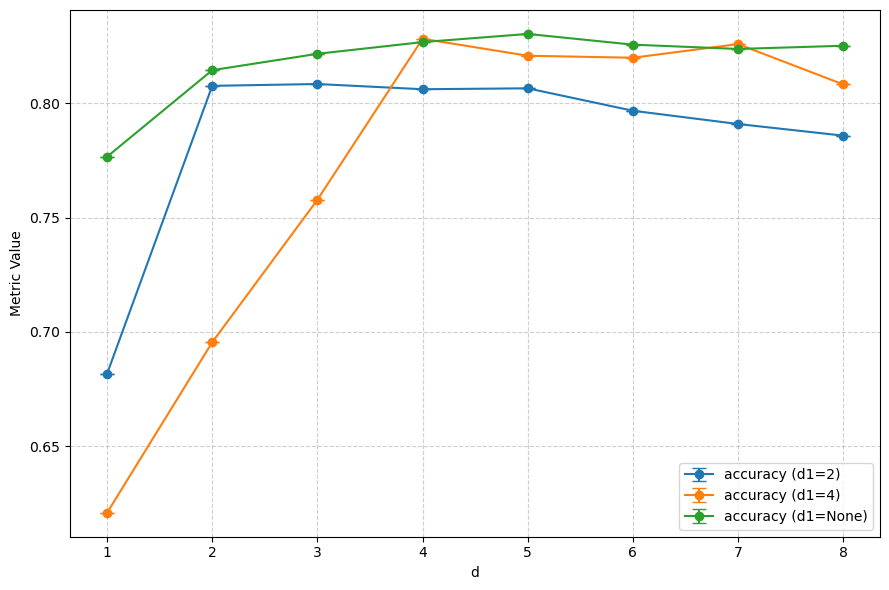

In [8]:
import pickle
from visualization import *

with open("Data_2/scan_d_d1_2.pkl", "rb") as f:
    results = pickle.load(f)

plot_metrics_vs_param(
    results, 
    param_x="d", 
    metrics =["accuracy"], 
    group_by="d1",
    sub_plot=False,
    save_path="Results/accuracy_vs_d_per_d1",
)